In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [2]:
level = ['03m', '10m', '20m']

In [32]:
def plot(ax, KEm, TKE, yr, level):
    ax.bar(X, KEm+TKE, width=.9, facecolor='k')
    ax.bar(X, KEm, width=.9, facecolor='pink')
    ax.legend(['TKE', 'MKE'], loc='upper left', frameon=False)
    ax.set_ylabel('Energy $(m^{2}/s^{2})$', fontsize='13')
    ax.set_xticks(np.arange(0, 76, 5))
    ax.set_ylim(0, yr)
    ax.text(.96, .9, level, transform=ax.transAxes)
    ax.vlines(60, 0, yr, 'r', linestyle='dashed')
    ax.vlines(75, 0, yr, 'r', ls='dashed')
    axx = ax.twinx()
    axx.plot(X, TKE/(KEm+TKE), 'co-', ms=3)
    axx.set_ylim(0, 1)
    axx.set_yticks([0, 0.5, 1.0])
    axx.set_yticklabels(['0.0', '0.5', '1.0'], color='c')
    axx.set_ylabel('TKE/(KE+TKE)', fontsize='13', color='c')

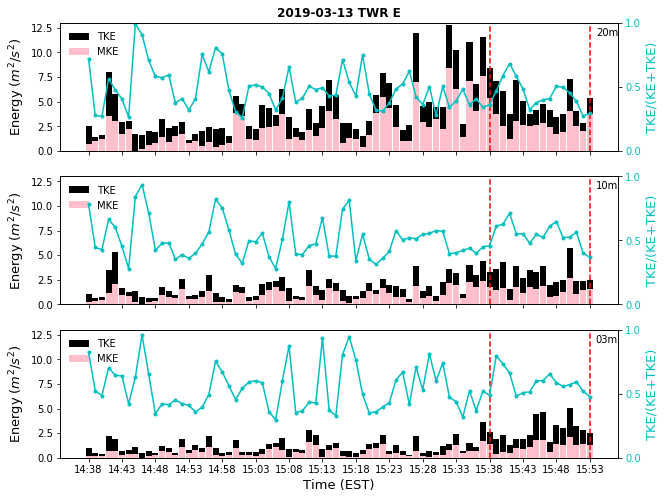

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 8))
axs = [ax3, ax2, ax1]
yr = [13, 13, 13]
for i in range(3):
    data = pd.read_table(f'./data/TKE/TWR_E/01_pitch_yaw_cooked_{level[i]}_mean.txt', delim_whitespace=True, skiprows=[1])
    data = data[data['1hr']==28]
    X = np.arange(0, len(data), 1)
    time = data['yyyymmddhhmm']
    KEm = (data['Um']**2 + data['Vm']**2 + data['Wm']**2)/2
    TKE = data['TKE']
    plot(axs[i], KEm, TKE, yr[i], level[i])
ax3.set_xticklabels([str(time.iloc[i])[-4:-2]+':'+str(time.iloc[i])[-2:] for i in range(0, 76, 5)])
ax3.set_xlabel('Time (EST)', fontsize=13)
plt.title('2019-03-13 TWR E', fontsize='large', fontweight='bold')
plt.show()

In [24]:
def plot(ax, X, TKE_t, yl, yr, level):
    ax.plot(X[:-1], TKE_t, 'b-o', ms=2, lw=1)
    ax.set_ylabel('$\\frac{\partial{TKE}}{\partial{t}}$', color='b', fontsize='14', fontweight='bold')
    ax.set_xticks(np.arange(0, 76, 7))
    ax.text(.01, .9, level, transform=ax.transAxes)
    ax.vlines(60, yl, yr, 'r', linestyle='dashed')
    ax.vlines(75, yl, yr, 'r', ls='dashed')
    ax.hlines(0, -3, 78, lw=1)
    ax.set_ylim(yl, yr)
    ax.set_xlim(-3, 78)
    
    axx = ax.twinx()
    axx.plot(X[:-1], TKE_t.cumsum(), c='lime', ls='--', marker='o', ms=2, lw=1)
    axx.set_ylim(yl, yr)
    axx.set_ylabel('Cum of $\\frac{\partial{TKE}}{\partial{t}}$', color='lime', fontsize='12', fontweight='bold')

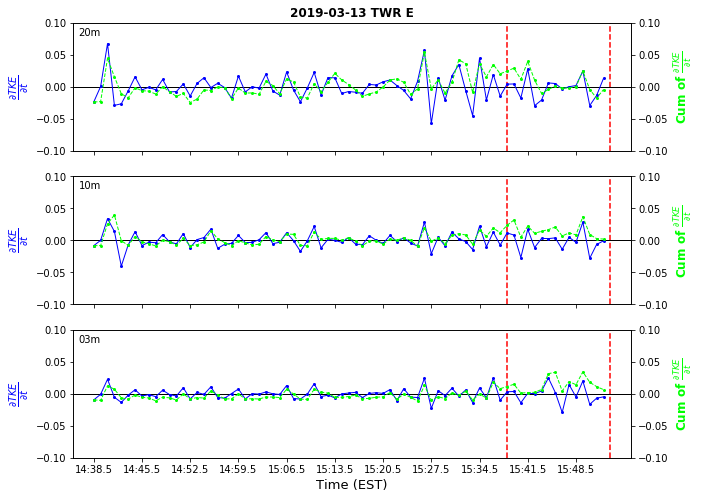

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 8))
axs = [ax3, ax2, ax1]
level = ['03m', '10m', '20m']
for i in range(3):
    data = pd.read_table(f'./data/TKE/TWR_E/01_pitch_yaw_cooked_{level[i]}_mean.txt', delim_whitespace=True, skiprows=[1])
    data = data[data['1hr']==28]
    X = np.arange(0, len(data), 1)
    time = data['yyyymmddhhmm']
    TKE = data['TKE']
    TKE_t = (np.array(TKE[1:]) - np.array(TKE[:-1]))/60.
    plot(axs[i], X, TKE_t, -.1, .1, level[i])
ax3.set_xticklabels([str(time.iloc[i])[-4:-2]+':'+f'{(float(str(time.iloc[i])[-2:])+.5):04.1f}' for i in range(0, 76, 7)])
ax3.set_xlabel('Time (EST)', fontsize=13)
ax1.set_title('2019-03-13 TWR E', fontsize='large', fontweight='bold')
plt.show()